In [1]:
import matplotlib.pyplot as plt
import math

def process():
    dict = {}
    f = open("result.txt")
    lines = f.readlines()
    for line in lines:
        c = line.split(",") 
        #c[0]: method, c[1]: theta, c[2]: input size(bs num) 
        #c[3]: en num, c[4]: cost, c[5]: time

        method = c[0]
        theta = c[1]
        bs_num = c[2]
        
        c[5] = c[5].replace("\n","")
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([c[3], c[4], c[5]])
                else:
                    dict[theta][method].update({bs_num: [[c[3], c[4], c[5]]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
            
    f.close()
    return dict
dict = process()
#print(dict) 

In [2]:
def getStatistic(dict):
    for t in dict:
        for m in dict[t]:
            for bs in dict[t][m]:
                en = 0
                cost = 0
                time = 0
                for value in dict[t][m][bs]:
                    #print(value)
                    en = en + int(value[0])
                    cost = cost + int(float(value[1]))
                    time = time + float(value[2])
                en = math.ceil(en / len(dict[t][m][bs]))
                cost = math.ceil(cost / len(dict[t][m][bs]))
                time = float("{:.2f}".format(time / len(dict[t][m][bs])))
                
                dict[t][m][bs] = [en, cost, time]

getStatistic(dict)
#print(dict)

{'greedy_fine': [10.5, 11.5, 12.5, 16.5, 16.5, 18.0, 21.0, 23.0, 27.0, 31.0, 37.0], 'greedy_new': [15.8, 18.3, 19.5, 24.6, 28.5, 33.6, 40.4, 65.2, 80.2, 91.5, 98.9], 'greedy_new_fine': [10.0, 11.5, 12.0, 15.0, 15.5, 16.5, 21.0, 23.0, 25.5, 30.5, 35.0], 'greedy': [17.9, 22.1, 24.1, 27.9, 33.5, 41.1, 50.0, 71.7, 87.8, 104.1, 120.9], 'mip_cluster': [10.771, 12.204, 12.992, 16.057, 18.353, 20.86, 28.614, 36.129, 43.201, 51.929, 60.154], 'greedy_avg': [10.6, 11.6, 12.7, 16.7, 16.8, 18.4, 21.5, 23.8, 28.1, 32.3, 38.9], 'greedy_new_avg': [10.1, 11.6, 12.1, 15.2, 15.8, 16.8, 21.4, 23.8, 26.6, 31.8, 36.6], 'mip': [10.417, 12.068, 12.704, 15.864, 17.473, 21.25, 31.585, 46.644, 105.507, 215.079, 1215.979], 'mip_cluster_2': [10.771, 12.204, 12.992, 16.03, 18.353, 20.825, 25.622, 34.822, 40.646, 49.368, 57.132]}


<Figure size 900x600 with 0 Axes>

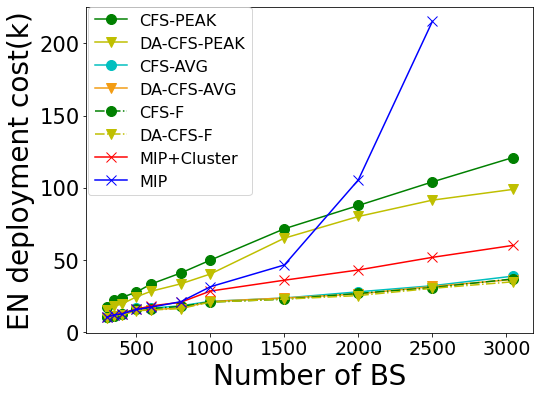

In [3]:
# dict[theta][method][bs_num] ->[en, cost, time]
plt.figure(dpi=150)
font = 28

def plotCost():
    theta = "22.0" # 14.0
    #"200", "250",
    x = [ "300", "350","400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
#     x = ["800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "300", "400","500", "600", "800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "250", "300", "350","400","450","500"]
    plot_dict = {}
#     random = []
#     greedy = []
#     greedy_new = []
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][1]
                    plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=21)

    n = [int(i) for i in x]
    #markersize=15, linewidth = 3,
    #plt.plot(n, plot_dict['random'], "y.-",  label="Random")
    plt.plot(n, plot_dict['greedy'], "go-",  label="CFS-PEAK", markersize=10)
    plt.plot(n, plot_dict['greedy_new'], "yv-",label="DA-CFS-PEAK", markersize=10)
    plt.plot(n, plot_dict['greedy_avg'], "co-",label="CFS-AVG", markersize=10)
    plt.plot(n, plot_dict['greedy_new_avg'], "v-", color="#F39C12", label="DA-CFS-AVG", markersize=10)
    plt.plot(n, plot_dict['greedy_fine'], "go-.",label="CFS-F", markersize=10)
    plt.plot(n, plot_dict['greedy_new_fine'], "yv-.",label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-",label="MIP+Cluster", markersize=10)
    
    plt.plot(n[0:10], plot_dict['mip'][0:10], "bx-",label="MIP", markersize=10)

#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "mx-",label="MIP", markersize=10)
    
    
    plt.legend(bbox_to_anchor=(0.37, 1), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)
    plt.savefig('./img/cost.pdf', bbox_inches = 'tight')
    
plotCost()

{'greedy_fine': [10.5, 11.5, 12.5, 16.5, 16.5, 18.0, 21.0, 23.0, 27.0, 31.0, 37.0], 'greedy_new': [15.8, 18.3, 19.5, 24.6, 28.5, 33.6, 40.4, 65.2, 80.2, 91.5, 98.9], 'greedy_new_fine': [10.0, 11.5, 12.0, 15.0, 15.5, 16.5, 21.0, 23.0, 25.5, 30.5, 35.0], 'greedy': [17.9, 22.1, 24.1, 27.9, 33.5, 41.1, 50.0, 71.7, 87.8, 104.1, 120.9], 'mip_cluster': [10.771, 12.204, 12.992, 16.057, 18.353, 20.86, 28.614, 36.129, 43.201, 51.929, 60.154], 'greedy_avg': [10.6, 11.6, 12.7, 16.7, 16.8, 18.4, 21.5, 23.8, 28.1, 32.3, 38.9], 'greedy_new_avg': [10.1, 11.6, 12.1, 15.2, 15.8, 16.8, 21.4, 23.8, 26.6, 31.8, 36.6], 'mip': [10.417, 12.068, 12.704, 15.864, 17.473, 21.25, 31.585, 46.644, 105.507, 215.079, 1215.979], 'mip_cluster_2': [10.771, 12.204, 12.992, 16.03, 18.353, 20.825, 25.622, 34.822, 40.646, 49.368, 57.132]}


<Figure size 900x600 with 0 Axes>

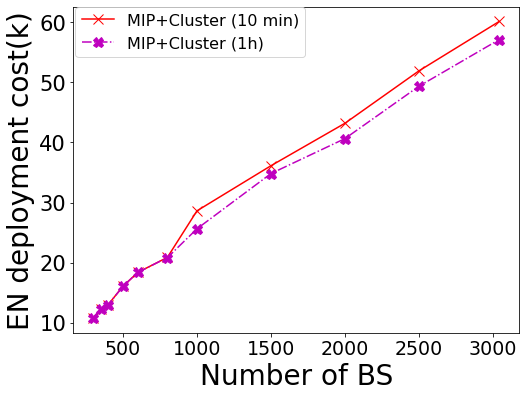

In [11]:
# dict[theta][method][bs_num] ->[en, cost, time]
plt.figure(dpi=150)

def plotCostMIP():
    theta = "22.0" # 14.0
    #"200", "250",
    x = [ "300", "350","400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
#     x = ["800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "300", "400","500", "600", "800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "250", "300", "350","400","450","500"]
    plot_dict = {}
#     random = []
#     greedy = []
#     greedy_new = []
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][1]
                    plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=21)

    n = [int(i) for i in x]
    #markersize=15, linewidth = 3,
    #plt.plot(n, plot_dict['random'], "y.-",  label="Random")
#     plt.plot(n, plot_dict['greedy'], "go-",  label="CFS-PEAK", markersize=10)
#     plt.plot(n, plot_dict['greedy_new'], "yv-",label="DA-CFS-PEAK", markersize=10)
#     plt.plot(n, plot_dict['greedy_avg'], "co-",label="CFS-AVG", markersize=10)
#     plt.plot(n, plot_dict['greedy_new_avg'], "v-", color="#F39C12", label="DA-CFS-AVG", markersize=10)
#     plt.plot(n, plot_dict['greedy_fine'], "go-.",label="CFS-F", markersize=10)
#     plt.plot(n, plot_dict['greedy_new_fine'], "yv-.",label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-",label="MIP+Cluster (10 min)", markersize=10)
    plt.plot(n, plot_dict['mip_cluster_2'], "mX-.",label="MIP+Cluster (1h)", markersize=10)
    

#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "mx-",label="MIP", markersize=10)
    
    
    plt.legend(bbox_to_anchor=(0.52, 1), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)
    plt.savefig('./img/costMIP.pdf', bbox_inches = 'tight')
    
plotCostMIP()

{'greedy_fine': [10.5, 11.5, 12.5, 15.5, 16.5, 18.0, 21.0, 23.0, 27.0, 31.0, 37.0], 'greedy_new': [15.8, 18.3, 19.5, 22.0, 24.6, 33.6, 40.4, 65.2, 80.2, 91.5, 98.9], 'greedy_new_fine': [10.0, 11.5, 12.0, 15.0, 15.0, 16.5, 21.0, 23.0, 25.5, 30.5, 35.0], 'greedy': [17.9, 22.1, 24.1, 25.0, 27.9, 41.1, 50.0, 71.7, 87.8, 104.1, 120.9], 'mip_cluster': [10.771, 12.204, 12.992, 14.589, 16.057, 20.86, 28.614, 36.129, 43.201, 51.929, 60.154], 'greedy_avg': [10.6, 11.6, 12.7, 15.7, 16.7, 18.4, 21.5, 23.8, 28.1, 32.3, 38.9], 'greedy_new_avg': [10.1, 11.6, 12.1, 15.2, 15.2, 16.8, 21.4, 23.8, 26.6, 31.8, 36.6], 'mip': [10.417, 12.068, 12.704, 14.358, 15.864, 21.25, 31.585, 46.644, 105.507, 215.079, 1215.979], 'mip_cluster_2': [10.771, 12.204, 12.992, 14.589, 16.03, 20.825, 25.622, 34.822, 40.646, 49.368, 57.132]}


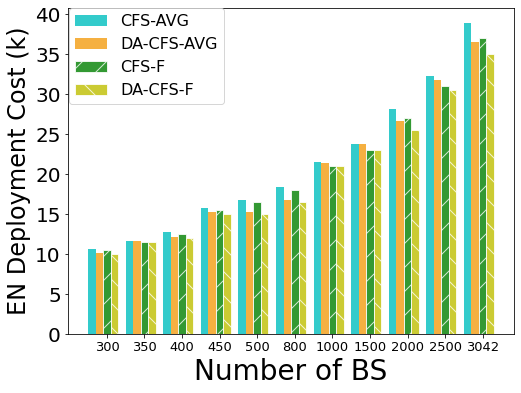

In [12]:
def plotAvg():
    theta = "22.0"
#     x = ["200", "500", "1000", "1500", "2000", "2500", "2769"]
    x = [ "300", "350","400","450","500","800", "1000", "1500", "2000", "2500", "3042"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
                else:
                    plot_dict[method].append(0)
            else:
                value = dict[theta][method][i][1]
                plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN Deployment Cost (k)', fontsize=24)

    r = range(1, len(plot_dict['greedy'])+1)

    p_greedy_avg = [i - 0.4 for i in r]
    p_greedy_new_avg = [i - 0.2 for i in r]
    p_greedy_fine = [i for i in r]
    p_greedy_new_fine = [i + 0.2 for i in r]
    #print(p_random)
                 
    bar1 = plt.bar(p_greedy_avg,plot_dict['greedy_avg'],width = 0.2, alpha = 0.8,color = 'c', label = 'CFS-AVG') 
    bar2 = plt.bar(p_greedy_new_avg,plot_dict['greedy_new_avg'],width = 0.2, alpha = 0.8,color = '#F39C12', label = 'DA-CFS-AVG') 
    bar3 = plt.bar(p_greedy_fine,plot_dict['greedy_fine'],width = 0.2, alpha = 0.8,color = 'g',hatch = '/', edgecolor='w', label = 'CFS-F') 
    bar4 = plt.bar(p_greedy_new_fine,plot_dict['greedy_new_fine'],width = 0.2, alpha = 0.8,color = 'y', hatch = '\\', edgecolor='w',label = 'DA-CFS-F') 
    
    #n = [int(i)/100 for i in x]
    
    plt.yticks(fontsize=20)
    plt.xticks(r,x, fontsize=13) 
    plt.legend(bbox_to_anchor=(0.35, 1), loc=1, borderaxespad=0., fontsize=16)

    plt.savefig('./img/cost_avg.pdf', bbox_inches = 'tight')
    #plt.grid(True)
    
plotAvg()

{'greedy_fine': [0.87, 2.28, 1.36, 1.35, 1.94, 2.0, 2.17, 4.04, 4.83, 10.3, 14.08, 24.03, 30.43], 'greedy_new': [0.29, 0.12, 0.11, 0.15, 0.19, 0.25, 0.3, 0.76, 1.31, 3.2, 5.79, 10.23, 17.17], 'greedy_new_fine': [2.09, 3.03, 2.24, 2.94, 3.79, 4.01, 3.28, 8.29, 10.61, 16.63, 31.89, 38.03, 55.26], 'greedy': [0.12, 0.31, 0.27, 0.36, 0.49, 0.63, 0.7, 1.27, 1.67, 4.35, 6.16, 11.21, 16.12], 'mip_cluster': [48.95, 85.86, 137.26, 353.29, 390.18, 365.84, 608.64, 839.26, 1033.81, 1588.85, 2673.66, 3078.77, 4145.17], 'greedy_avg': [2.45, 3.53, 4.14, 6.06, 7.64, 10.35, 11.12, 42.83, 74.36, 173.94, 297.52, 280.92, 426.35], 'greedy_new_avg': [1.76, 3.29, 3.77, 5.88, 8.81, 9.8, 11.37, 39.87, 73.1, 163.64, 210.25, 271.68, 674.45], 'mip': [38.68, 62.86, 148.8, 447.05, 584.2, 882.02, 2147.2, 3648.94, 3618.06, 3629.1, 3647.77, 3687.43, 3735.14]}


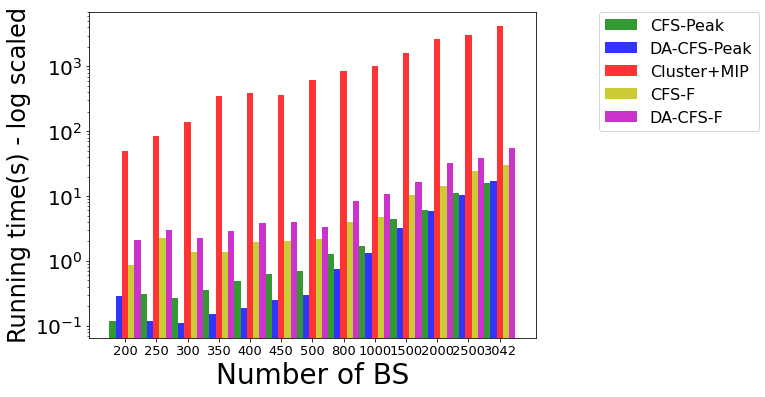

In [18]:
# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
# for bar, pattern in zip(bars, patterns):
#     bar.set_hatch(pattern)

def plotTimeBar():
    theta = "18.0"
#     x = ["200", "500", "1000", "1500", "2000", "2500", "2769"]
    x = ["200", "250", "300", "350","400","450","500","800", "1000", "1500", "2000", "2500", "3042"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][i][2])
                else:
                    plot_dict[method].append(0)
            else:
                plot_dict.update({method:[dict[theta][method][i][2]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    plt.yscale("log")
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=24)

    r = range(1, len(plot_dict['greedy'])+1)
#     p_random = [i - 0.2 for i in r]
    p_greedy = [i - 0.4 for i in r]
    p_greedy_new = [i - 0.2 for i in r]
#     p_mip = [i + 0.4 for i in r]
    p_mip_cluster = [i for i in r]
    p_greedy_fine = [i + 0.2 for i in r]
    p_greedy_new_fine = [i + 0.4 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = plot_dict['random'], width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,plot_dict['greedy'],width = 0.2, alpha = 0.8,color = 'g',label = 'CFS-Peak') 
    bar3 = plt.bar(p_greedy_new,plot_dict['greedy_new'],width = 0.2, alpha = 0.8,color = 'b',label = 'DA-CFS-Peak') 
#     bar4 = plt.bar(p_mip,plot_dict['mip'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP') 
    bar5 = plt.bar(p_mip_cluster,plot_dict['mip_cluster'],width = 0.2, alpha = 0.8,color = 'r',label = 'Cluster+MIP')
    bar6 = plt.bar(p_greedy_fine,plot_dict['greedy_fine'],width = 0.2, alpha = 0.8,color = 'y',label = 'CFS-F') 
    bar7 = plt.bar(p_greedy_new_fine,plot_dict['greedy_new_fine'],width = 0.2, alpha = 0.8,color = 'm',label = 'DA-CFS-F') 
    
    #n = [int(i)/100 for i in x]
    
    plt.yticks(fontsize=20)
    plt.xticks(r,x, fontsize=13) 
    plt.legend(bbox_to_anchor=(1.5, 1), loc=1, borderaxespad=0., fontsize=16)

    plt.savefig('./img/time.pdf', bbox_inches = 'tight')
    #plt.grid(True)
    
plotTimeBar()

{'greedy_fine': [1.14, 1.82, 2.16, 3.78, 2.7, 4.86, 6.48, 12.19, 12.4, 17.36, 24.53], 'greedy_new': [0.07, 0.11, 0.23, 0.29, 0.37, 0.87, 1.2, 2.55, 4.4, 6.64, 11.02], 'greedy_new_fine': [1.6, 3.18, 4.55, 5.48, 6.02, 10.93, 14.14, 22.34, 26.72, 34.21, 48.55], 'greedy': [0.09, 0.19, 0.54, 1.71, 0.81, 1.28, 1.66, 5.1, 4.93, 6.82, 11.29], 'mip_cluster': [73.64, 228.67, 308.62, 619.47, 490.68, 1249.45, 1240.79, 2003.27, 3185.76, 3938.51, 5321.4], 'greedy_avg': [6.74, 11.13, 10.82, 18.74, 35.21, 70.55, 56.88, 147.2, 207.62, 390.69, 729.98], 'greedy_new_avg': [4.81, 10.66, 9.23, 21.97, 35.7, 58.29, 59.19, 151.21, 198.63, 597.54, 508.49], 'mip': [81.12, 243.66, 1016.03, 3604.35, 3606.85, 3612.74, 3612.51, 3628.8, 3649.18, 3686.89, 3735.34]}


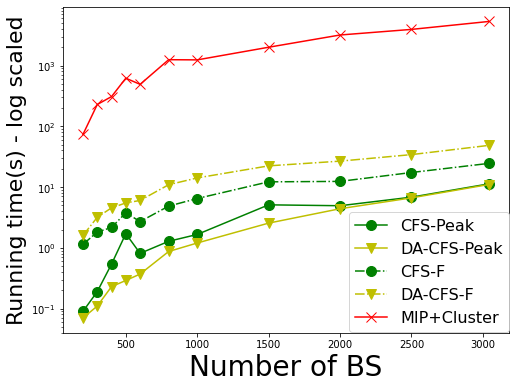

In [19]:
def plotTimeLine():
    theta = "22.0"
    x = ["200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][2]
                    plot_dict[method].append(value)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][2]
                    plot_dict.update({method:[value]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    plt.yscale("log")
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=22)
#     plt.ylabel(r'Algorithm running time(s) when $\theta$ = ' + theta, fontsize=18)

    n = [int(i) for i in x]
    
#     plt.plot(n, plot_dict['random'], "r.-", label="Random")
    plt.plot(n, plot_dict['greedy'], "go-", label="CFS-Peak", markersize=10)
    plt.plot(n, plot_dict['greedy_new'], "yv-", label="DA-CFS-Peak", markersize=10)
#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "yo-", label="MIP")
    plt.plot(n, plot_dict['greedy_fine'], "go-.", label="CFS-F", markersize=10)
    plt.plot(n, plot_dict['greedy_new_fine'], "yv-.", label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=10)
    
    
    plt.legend(bbox_to_anchor=(1, 0.37), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)
    fig.savefig('./img/time_line.pdf', bbox_inches = 'tight')
    
plotTimeLine()

{'greedy_fine': [17, 21, 25, 33, 33, 36, 42, 46, 54, 62, 74], 'greedy_new': [17, 20, 24, 30, 31, 33, 42, 46, 51, 61, 70], 'greedy_new_fine': [17, 20, 24, 30, 31, 33, 42, 46, 51, 61, 70], 'greedy': [17, 21, 25, 33, 33, 36, 42, 46, 54, 62, 74], 'mip_cluster': [15, 20, 22, 26, 30, 34, 46, 54, 58, 70, 78], 'greedy_avg': [17, 21, 25, 33, 33, 36, 42, 46, 54, 62, 74], 'greedy_new_avg': [17, 20, 24, 30, 31, 33, 42, 46, 51, 61, 70], 'mip': [15, 18, 21, 26, 38, 32, 55, 73, 213, 494, 3011]}


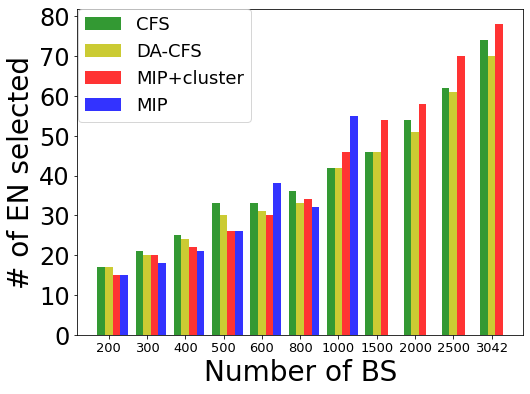

In [20]:
# def plotENLine():
#     theta = "14.0"
#     #x = ["150", "200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "2769"]
#     x = ["250", "300", "350","400","450","500","800", "1000", "1500", "2000", "2500", "2769"]
#     plot_dict = {}
    
#     for method in dict[theta]:
#         for i in x:
#             if method in plot_dict:
#                 if i in dict[theta][method]:
#                     plot_dict[method].append(dict[theta][method][i][0])
#             else:
#                 if method in dict[theta]:
#                     plot_dict.update({method:[dict[theta][method][i][0]]})
            
#     print(plot_dict)
    
#     #fig,ax = plt.subplots()
#     fig = plt.figure(figsize=(8, 6))
#     plt.yscale("log")
    
#     plt.xlabel(r'Number of BS')
#     plt.ylabel(r'EN # when $\theta$ = 10')

#     n = [int(i) for i in x]
    
#     plt.plot(n, plot_dict['random'], "y.-", label="Random")
#     plt.plot(n, plot_dict['greedy'], "gx-", label="CFS")
#     plt.plot(n, plot_dict['greedy_new'], "bv-", label="DA-CFS")
#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "ro-", label="MIP")
    
    
#     plt.legend(bbox_to_anchor=(0.18, 1), loc=1, borderaxespad=0., fontsize=font)

#     #plt.grid(True)
#     fig.savefig('./img/time.pdf', bbox_inches = 'tight')

def plotENBar():
    theta = "22.0" #14
    x = ["200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
    #x = ["200", "500", "1000", "1500", "2000", "2500", "2768"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][i][0])
                else:
                    plot_dict[method].append(0)
            else:
                plot_dict.update({method:[dict[theta][method][i][0]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)

    r = range(1, len(plot_dict['greedy'])+1)
    p_greedy = [i - 0.2 for i in r]
    p_greedy_new = [i for i in r]
    p_mip = [i + 0.2 for i in r]
    p_mip_cluster = [i + 0.4 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = plot_dict['random'], width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,plot_dict['greedy'],width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy_new,plot_dict['greedy_new'],width = 0.2, alpha = 0.8,color = 'y',label = 'DA-CFS') 
    bar3 = plt.bar(p_mip,plot_dict['mip_cluster'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP+cluster')
    bar4 = plt.bar(p_mip_cluster[0:7],plot_dict['mip'][0:7],width = 0.2, alpha = 0.8,color = 'b',label = 'MIP')
    
    plt.xticks(r,x) 
    plt.legend(bbox_to_anchor=(0.39, 1), loc=1, borderaxespad=0., fontsize=18)

    #plt.grid(True)
    plt.savefig('./img/en.pdf', bbox_inches = 'tight')
    
plotENBar()


{'greedy_fine': [230, 167, 128, 103, 91, 75, 74, 65, 59], 'greedy_new': [224, 163, 125, 97, 90, 75, 70, 64, 58], 'greedy_new_fine': [224, 163, 125, 97, 90, 75, 70, 64, 58], 'greedy': [230, 167, 128, 103, 91, 75, 74, 65, 59], 'mip_cluster': [238, 169, 140, 115, 97, 101, 78, 72, 73], 'greedy_avg': [230, 167, 128, 103, 91, 75, 74, 65, 59], 'greedy_new_avg': [224, 163, 125, 97, 90, 75, 70, 64, 58], 'mip': [1173, 2969, 3011, 2985]}


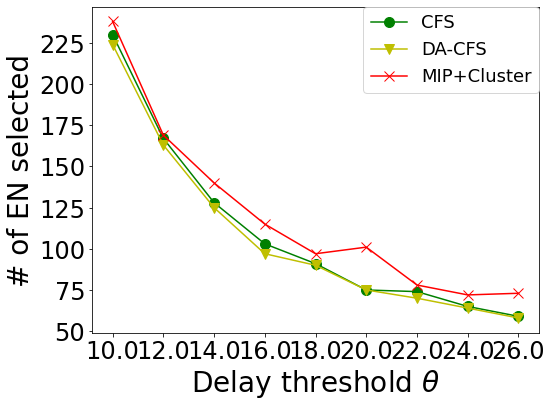

In [21]:
# dict[theta][method][bs_num] ->[en, cost, time]
def plotThetaWithEN():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][bs][0])
            else:
                if bs in dict[theta][method]:
                    plot_dict.update({method:[dict[theta][method][bs][0]]})
            
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
#     plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize=markerSize)
    plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=markerSize)
#     plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    
    plt.savefig('./img/theta_en.pdf', bbox_inches = 'tight')
    
plotThetaWithEN()


{'greedy_fine': [115.0, 83.5, 64.0, 51.5, 45.5, 37.5, 37.0, 32.5, 29.5], 'greedy_new': [336.9, 249.2, 186.5, 150.1, 117.2, 121.9, 98.9, 95.6, 89.9], 'greedy_new_fine': [112.0, 81.5, 62.5, 48.5, 45.0, 37.5, 35.0, 32.0, 29.0], 'greedy': [402.3, 315.9, 248.4, 193.1, 154.6, 138.7, 120.9, 113.5, 99.2], 'mip_cluster': [174.884, 131.466, 103.502, 87.202, 76.406, 69.434, 60.154, 54.615, 52.583], 'greedy_avg': [118.1, 86.2, 66.6, 53.8, 47.6, 39.4, 38.9, 34.2, 31.1], 'greedy_new_avg': [114.5, 83.8, 64.4, 50.3, 46.6, 39.3, 36.6, 33.5, 30.5], 'mip': [491.662, 1199.404, 1215.979, 1204.063]}


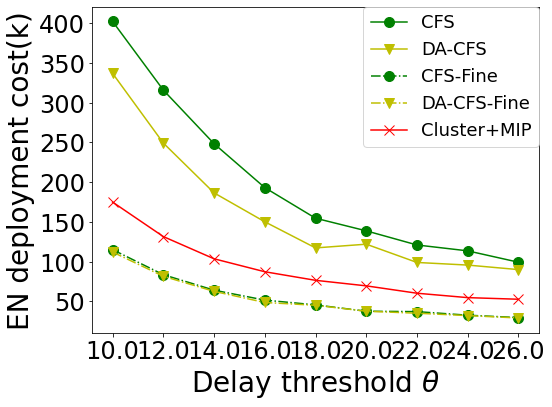

In [22]:
def plotThetaWithCost():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict[method].append(value/1000)
            else:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict.update({method:[value/1000]})
            
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    #i - 0.2 for i in r
#     plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_fine'], "go-.", label="CFS-Fine", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_new_fine'], "yv-.", label="DA-CFS-Fine", markersize = markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="Cluster+MIP", markersize = markerSize)
#     plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    plt.savefig('./img/theta_cost.pdf', bbox_inches = 'tight')
    
plotThetaWithCost()


{'greedy_fine': [62.27, 41.98, 34.6, 36.79, 30.43, 25.88, 24.53, 37.89, 30.22], 'greedy_new': [60.51, 31.28, 22.15, 22.26, 17.17, 13.17, 11.02, 16.39, 12.8], 'greedy_new_fine': [94.5, 59.14, 52.77, 62.46, 55.26, 49.87, 48.55, 83.72, 65.99], 'greedy': [50.23, 29.94, 22.31, 21.2, 16.12, 12.58, 11.29, 16.5, 13.22], 'mip_cluster': [1499.18, 2760.86, 3001.09, 3345.7, 4145.17, 4316.29, 5321.4, 5247.31, 5304.45], 'greedy_avg': [273.23, 305.79, 354.62, 444.24, 426.35, 544.93, 729.98, 623.62, 643.2], 'greedy_new_avg': [254.29, 273.06, 306.85, 384.78, 674.45, 497.0, 508.49, 660.74, 642.77], 'mip': [3735.14, 3718.09, 3735.34, 3734.86]}


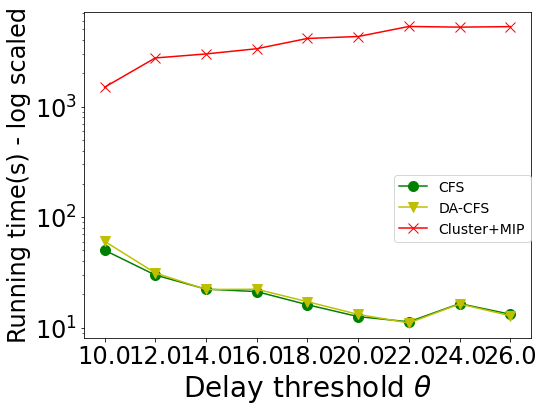

In [23]:
def plotThetaWithTimeLine():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if bs in dict[theta][method]:
                if method in plot_dict:
                    plot_dict[method].append(dict[theta][method][bs][2])
                else:
                    plot_dict.update({method:[dict[theta][method][bs][2]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.yscale("log")
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=24)
    
    #plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize=markerSize)
    plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="Cluster+MIP", markersize=markerSize)
#     plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 0.5), loc=1, borderaxespad=0., fontsize=14)
    plt.savefig('./img/theta_time.pdf', bbox_inches = 'tight')
    
plotThetaWithTimeLine()

['6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28']
[164, 164, 163, 162, 162, 163, 162, 162, 162, 162, 162, 162]
[362.0, 343.4, 360.5, 358.4, 357.2, 354.1, 353.1, 346.8, 235.9, 232.7, 230.5, 227.3]


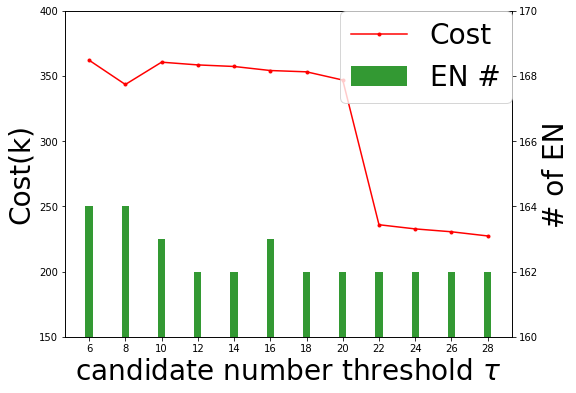

In [24]:
def plot_tau():
    x = []
    en = []
    cost = []
    
    f = open("result_tau.txt")
    lines = f.readlines()

    count = 1
    for line in lines:
        if(count % 2 == 0):
            c = line.split(",") 
            #c[0]: tau, c[1]: en, c[2]: cost
            x.append(c[0])
            en.append(int(c[1]))
            cost.append(int(c[2].replace("\n",""))/1000)          
        count = count + 1
    f.close()
    
    print(x)
    print(en)
    print(cost)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax = fig.add_subplot(111)
    line_cost = ax.plot(x, cost, "r.-", label="Cost")
    ax.set_ylim(150, 400)
    
    ax2 = ax.twinx()
    #line_en = ax2.plot(x, en, "ro-", label="EN #")
    r = range(1, len(en)+1)
    p= [i - 1 for i in r]
    bar_en = ax2.bar(p, en,width = 0.2, alpha = 0.8,color = 'g',label = 'EN #')
    
    ax2.set_ylim(160, 170)
    
#     ax.set_xticks(fontsize=font)
#     ax.set_yticks(fontsize=font)
#     ax2.set_xticks(fontsize=font)

    ax.set_xlabel(r'candidate number threshold $\tau$', fontsize=font)
    ax.set_ylabel(r'Cost(k)', fontsize=font)
    ax2.set_ylabel(r'# of EN', fontsize=font)
    

    
    plt.legend(handles = [line_cost[0], bar_en], bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=font)
    
    #plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/tau.pdf', bbox_inches = 'tight')
    
plot_tau()

In [25]:
import matplotlib.pyplot as plt
def process_distribution():
    dict = {}
    f = open("distribution.txt")
    lines = f.readlines()

    for line in lines[0:]:
        c = line.split(",") 
        #c[0]: name, c[1]: theta, c[2]: bs num, c[3]: trans delay, c[4]: comp delay
        method = c[0]
        theta = c[1]
        bs_num = c[2]
        trans = float(c[3])
        comp = float(c[4].replace("\n",""))
        
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([trans, comp])
                else:
                    dict[theta][method].update({bs_num: [[trans, comp]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
    f.close()
    #print(dict)
    return dict

    
dict = process_distribution()

[25, 56, 78, 88, 131, 167, 208, 209, 244, 239, 267, 263, 298, 353]
[62, 152, 162, 205, 206, 172, 206, 201, 205, 205, 183, 197, 256, 236]
[69, 190, 212, 251, 253, 211, 244, 213, 206, 188, 150, 156, 163, 147]


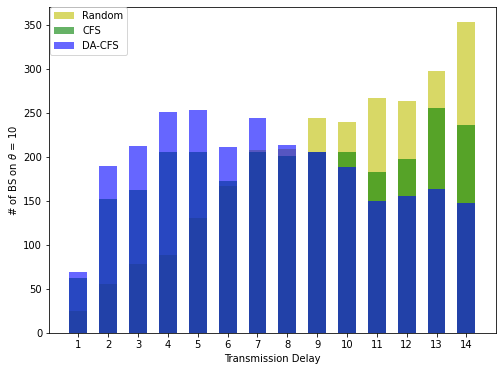

In [26]:
def plot_dist_bar():
    theta = "14.0"
    method = "greedy"
    bs_num = "2769"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(int(float(theta))):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
    for item in dict[theta]["random"][bs_num][0:]:
        cate = int(item[0]%14)
        y_random[cate] = y_random[cate] + 1
        
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]
    
 #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')

    r = range(1, len(x)+1)
    p_random = [i - 0.2 for i in r]
    p_greedy = [i for i in r]
    p_greedy_new = [i + 0.2 for i in r]
    #p_mip = [i + 0.4 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = y_random, width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
#     bar2 = plt.bar(p_greedy,y_greedy,width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
#     bar3 = plt.bar(p_greedy_new,y_greedy_new,width = 0.2, alpha = 0.8,color = 'b',label = 'DA-CFS') 

    bar1 = plt.bar(p_greedy, height = y_random, width = 0.6, alpha = 0.6, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,y_greedy,width = 0.6, alpha = 0.6,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy,y_greedy_new,width = 0.6, alpha = 0.6,color = 'b',label = 'DA-CFS') 
    #bar4 = plt.bar(p_mip,plot_dict['mip'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP')
    plt.xticks(r,x) 

    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/distribution.pdf', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()

plot_dist_bar()

In [27]:
def plot_dist_line():
    theta = "14.0"
    method = "greedy"
    bs_num = "2769"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(int(float(theta))):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
    for item in dict[theta]["random"][bs_num][0:]:
        cate = int(item[0]%14)
        y_random[cate] = y_random[cate] + 1
        
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]

    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')
    
    #i - 0.2 for i in r
    plt.plot(x, y_random, "y.-", label="Random")
    plt.plot(x, y_greedy, "rx-", label="CFS")
    plt.plot(x, y_greedy_new, "bv-", label="DA-CFS")
    
    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)

    plt.savefig('./img/distribution.pdf', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()
    
#plot_dist_line()

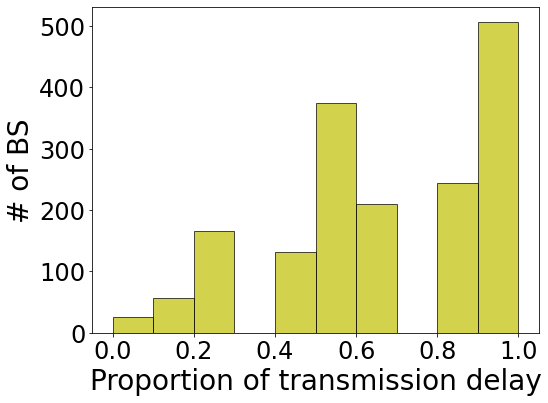

In [36]:

def plot_dist_his_random():
    theta = "14.0"
    method = "random"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/10 for i in dict[theta]["random"][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    
    plt.hist(data, bins = 10,align='mid',range=[0, 1],facecolor='y', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_random.pdf', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_random()

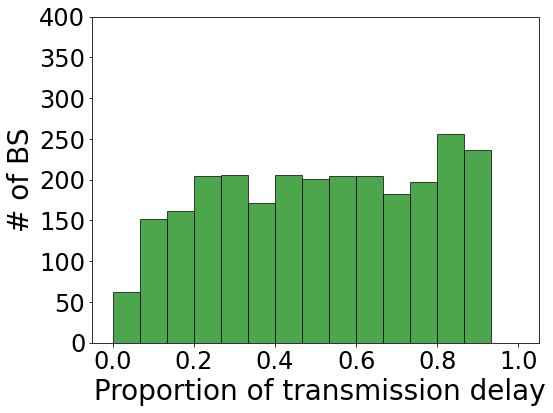

In [43]:
def plot_dist_his_cfs():
    theta = "14.0"
    method = "greedy"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/15 for i in dict[theta][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r' Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0,400)
    
    plt.hist(data, bins = 15,align='mid',range=[0, 1],facecolor='g', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_cfs.pdf', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_cfs()

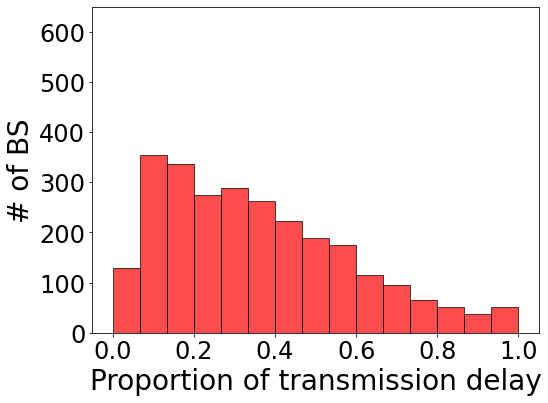

In [53]:
def plot_dist_his_cmip():
    theta = "22.0"
    method = "mip_cluster"
    bs_num = "2769"
    
    data = [(int(i[0])%22)/15 for i in dict[theta][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0, 400)
    
    plt.hist(data, bins = 15,align='mid',range=[0, 1],facecolor='r', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_mip_cluster.pdf', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_cmip()